In [81]:
from src.Sonufy import *
from src.AudioDataGenerator import AudioDataGenerator
import matplotlib.pyplot as plt

In [90]:
adg = AudioDataGenerator(batch_size=1, input_size=(64,1030), output_size=(64,64), directory='data/mels')

Found 262686 files for prediction set


In [86]:
sonufy = Sonufy(latent_dims=64, output_size=(64,64))

In [57]:
# sonufy.build_model(filters=(16,32,64,256))
sonufy.build_model()

In [58]:
sonufy.train(mel_directory='data/mels', epochs=10, train_test_split=.02, batch_size=128, sample_size=100000)

Found 98000 files for training set
Found 2000 files for testing set
Epoch 1/10
765/765 [==============================] - 259s 337ms/step - loss: 0.0084 - val_loss: 0.0049
Epoch 2/10
765/765 [==============================] - 259s 338ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 3/10
765/765 [==============================] - 257s 336ms/step - loss: 0.0044 - val_loss: 0.0042
Epoch 4/10
765/765 [==============================] - 257s 336ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/10
765/765 [==============================] - 258s 337ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 6/10
765/765 [==============================] - 261s 341ms/step - loss: 0.0038 - val_loss: 0.0036
Epoch 7/10
765/765 [==============================] - 259s 338ms/step - loss: 0.0036 - val_loss: 0.0036
Epoch 8/10
765/765 [==============================] - 261s 341ms/step - loss: 0.0035 - val_loss: 0.0034
Epoch 9/10
765/765 [==============================] - 262s 342ms/step - loss: 0.0034 - val_loss: 0.0

In [91]:
model_path = 'data/test_64dim_2/'

sonufy.save_encoder(model_path)
sonufy.build_vectors_from_model(mel_directory='data/mels', all_tracks_file='data/all_tracks_shuffled.feather')
sonufy.save(model_path)

2022-09-09 16:45:35.636 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-09 16:45:35.844 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpjul3dptp/assets
2022-09-09 16:45:36.915145: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-09 16:45:36.915343: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-09 16:45:36.918183: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmpjul3dptp
2022-09-09 16:45:36.930964: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-09 16:45:36.930976: I tens

Encoder saved to "data/test_64dim_2/".
Getting predictions from autoencoder...


INFO: Applying 1 TensorFlow Lite delegate(s) lazily.


[============================================================>] 262717 / 262717

7.94 minutes elapsed
Building tracks dataframe...
Track dataframe built. 0.17 minutes elapsed
Building genre distributions...
[============================================================>] 262717 / 262717

Genre distributions built. 1.26 minutes elapsed
Latent Space Built.


2022-09-09 16:55:07.787 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 10). These functions will not be directly callable after loading.
2022-09-09 16:55:08.365 INFO    tensorflow: Assets written to: data/test_64dim_2/assets


Model saved to "data/test_64dim_2/".
saved full model


2022-09-09 16:55:09.289 WARNING absl: Found untraced functions such as _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op, _jit_compiled_convolution_op while saving (showing 5 of 6). These functions will not be directly callable after loading.
2022-09-09 16:55:09.485 INFO    tensorflow: Assets written to: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmps0_wufjw/assets
2022-09-09 16:55:10.845196: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-09-09 16:55:10.845213: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-09-09 16:55:10.845340: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/jy/34vkbxz97tbgm78bc07fmx380000gn/T/tmps0_wufjw
2022-09-09 16:55:10.848149: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-09-09 16:55:10.848165: I tens

Encoder saved to "data/test_64dim_2/".
saved encoder
saved database files
Saved full model, encoder, and database files in data/test_64dim_2/.


In [87]:
sonufy.load('data/test_64dim/')

Autoencoder loaded from "data/test_64dim/".
loaded full model
loaded encoder
Loaded tracks.
Loaded genres.
loaded scaler
loaded database files


In [92]:
test_img = adg.take(5, return_filename=True)[0]
test_img2 = adg.take(0)[0]

Two separate images taken from different tracks:

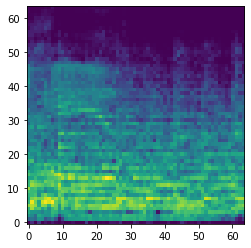

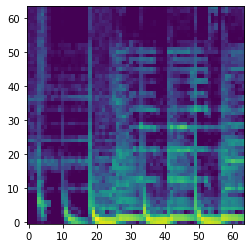

In [93]:
plt.imshow(test_img[0], origin='lower')
plt.show()
plt.imshow(test_img2[0], origin='lower')
plt.show()

Autoencoder predictions for those images.

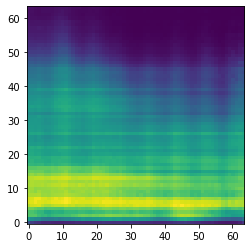

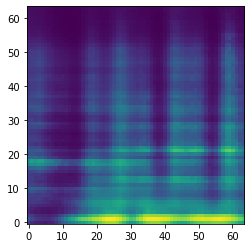

In [94]:
plt.imshow(sonufy.autoencoder(test_img)[0], origin='lower')
plt.show()
plt.imshow(sonufy.autoencoder(test_img2)[0], origin='lower')
plt.show()

Distribution comparison between two images.

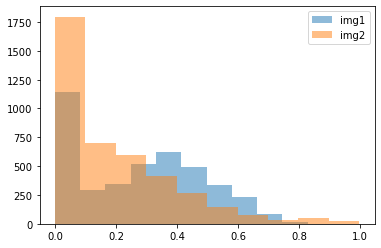

In [95]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='img1')
plt.hist(np.array(test_img2[0]).reshape(-1), alpha=0.5, label='img2')
plt.legend()
plt.show()

Distribution comparision between one image and the prediction.

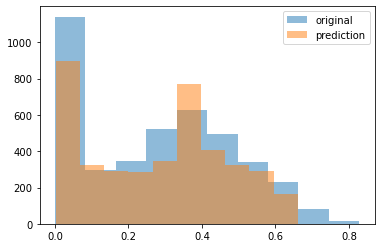

In [96]:
plt.hist(np.array(test_img[0]).reshape(-1), alpha=0.5, label='original')
plt.hist(np.array(sonufy.autoencoder(test_img)[0]).reshape(-1), alpha=0.5, label='prediction')
plt.legend()
plt.show()

comparison between encoded original and encoded prediction

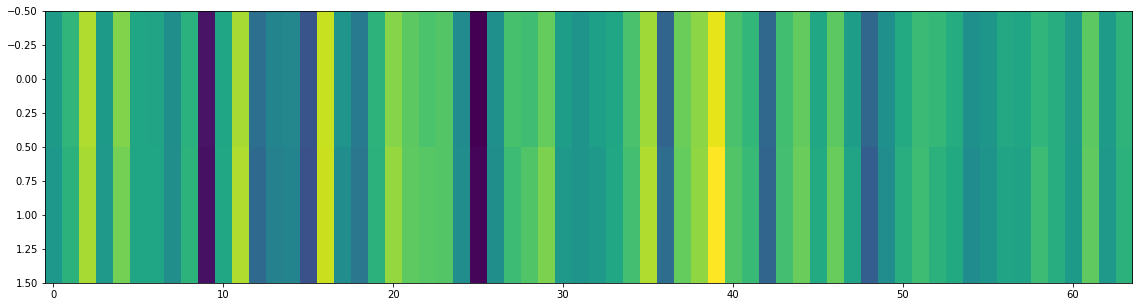

In [97]:
concat_img = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(test_img)[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img, aspect=8)

compare encoded between two images

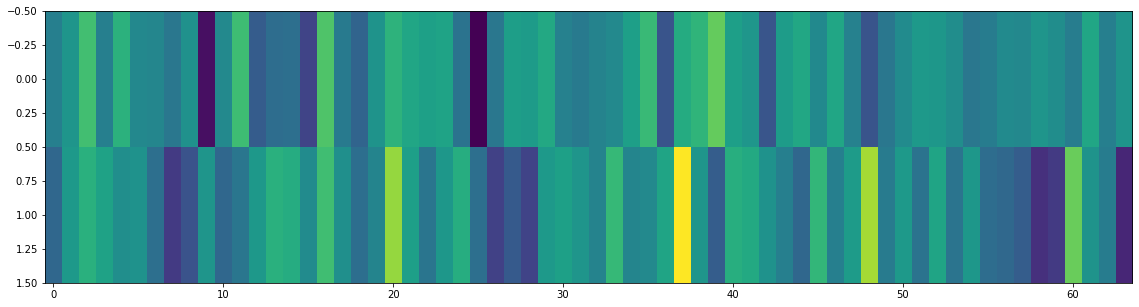

In [98]:
concat_img_compare = np.array([sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

compare encoded between the mean of the first image batch and the two images.

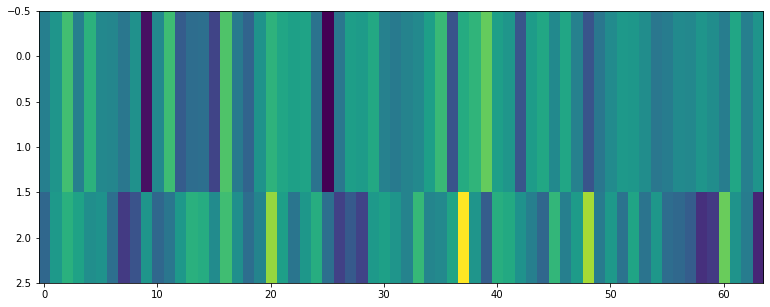

In [99]:
concat_img_compare = np.array([np.array(sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))).mean(axis=0), sonufy.autoencoder.encoder(sonufy.autoencoder(test_img))[0], sonufy.autoencoder.encoder(sonufy.autoencoder(test_img2))[0]])
plt.figure(figsize=(20,5))
plt.imshow(concat_img_compare, aspect=8)

Look at the scale of each feature in the encoded space. Needs to be scaled which is what is happening later on.

In [100]:
pd.Series(np.array(sonufy.autoencoder.encoder(test_img)[0]).reshape(-1))

0    -1.653359
1     0.589016
2     5.264453
3    -1.620123
4     3.622643
        ...   
59    0.146401
60   -1.386659
61    2.885293
62   -1.551521
63    0.567688
Length: 64, dtype: float32

In [101]:
concat_img_compare[0].shape

(64,)

heat map cosine similarity between encoded images for entire batch vs batch

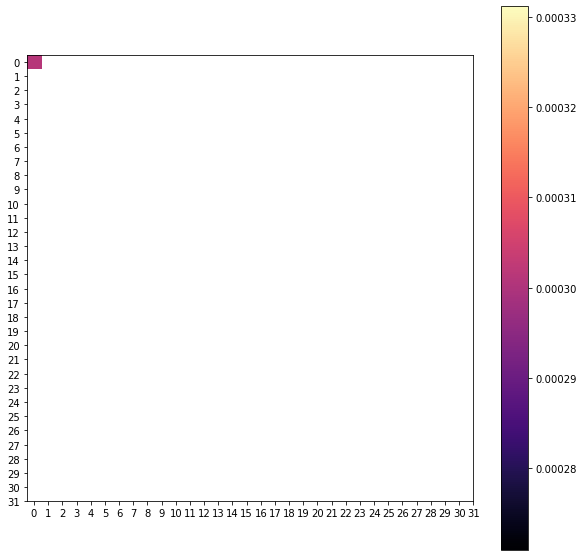

In [102]:
from sklearn.metrics.pairwise import cosine_similarity

plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(sonufy.autoencoder.encoder(test_img), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.yticks(ticks=range(32))
plt.colorbar()
plt.show()

cosine similarity between mean and the entire batch of the second image.

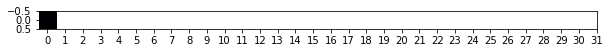

In [103]:
plt.figure(figsize=(10,10))
plt.imshow(cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), sonufy.autoencoder.encoder(test_img2)), cmap='magma')
plt.xticks(ticks=range(32))
plt.show()

cosine similarity between encoded space of the mean of the two images.

In [104]:
cosine_similarity(np.array(sonufy.autoencoder.encoder(test_img)).mean(axis=0).reshape(1,-1), np.array(sonufy.autoencoder.encoder(test_img2)).mean(axis=0).reshape(1,-1))


array([[0.00030106]], dtype=float32)

In [105]:
a, b, c, d = sonufy.search_for_recommendations(query='too ', get_time_and_freq=True)

INFO: Applying 1 TensorFlow Lite delegate(s) lazily.
/Users/michaelroth/miniforge3/envs/golden_env/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [106]:
a['name']

'Love You So'

In [107]:
b

,track_name,track_uri,artist_name,similarity,track_popularity,time_similarity,frequency_similarity
0,Cuándo Podrás Amar,spotify:track:5BFP1gLPvRrO0Po2oQRo6m,Las Pelotas,0.917450,49,0.866755,0.951102
1,They Lived It Up,spotify:track:229IQYwsFIrv4KsC1jDWQQ,Tony Jackson,0.894825,15,0.776162,0.967866
2,Tú Ve,spotify:track:7pOuB6eH3MB758FlUqdcV7,Kevin Johansen,0.894166,44,0.761927,0.969885
3,Arizona,spotify:track:16LmskiO3GmVMbRExr2rpe,Pianos Become The Teeth,0.890652,30,0.787284,0.951182
4,Come Back To Bed,spotify:track:5HoV892c7zwm92xx3vnWBY,Sean Stemaly,0.887304,52,0.822650,0.949405
5,Et Liv Er En Idé,spotify:track:0fAGCOBLgjGSFyhdmTc3Cl,Tue West,0.886262,16,0.795442,0.949383
6,This Boy Is Exhausted,spotify:track:4fIyL9dWQgsF1R6MWrnMy8,The Wrens,0.886027,32,0.803615,0.965769
7,The Artist's High,spotify:track:0N2Jke0NjFxoWStGsc7IOS,Acid Ghost,0.885697,42,0.752334,0.962144
8,Someone You Call Baby,spotify:track:3GtX83GTiEEpiZ7fn1eNhK,San Fermin,0.885580,40,0.772753,0.952887
9,First Love,spotify:track:6FJD0pyhN430hfO8IyUE3f,Eric Martin,0.883440,19,0.796061,0.939750


In [78]:
similarity_img = np.concatenate([np.array(d), np.array(c[sonufy.latent_cols])])

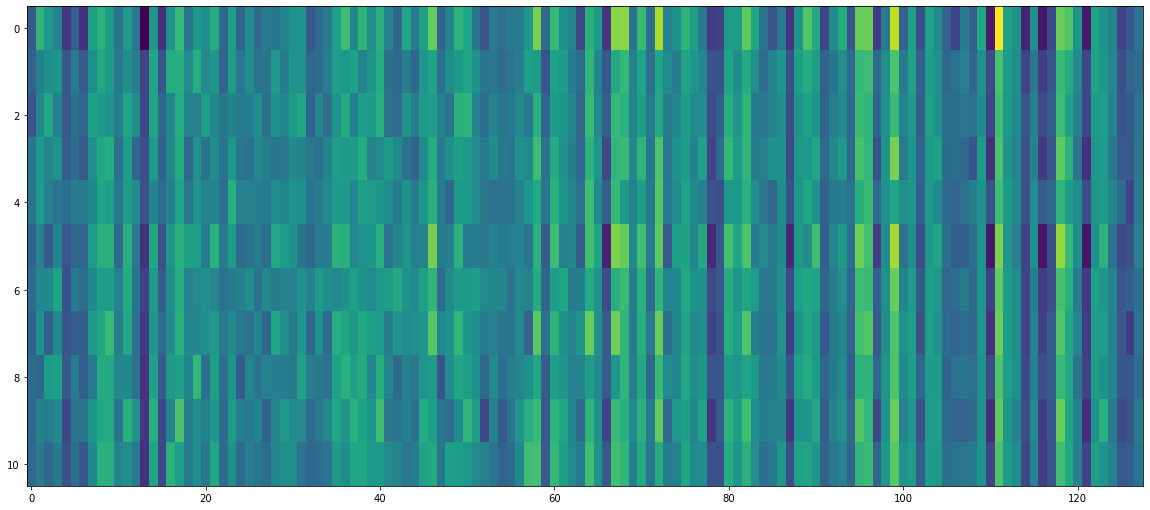

In [79]:
plt.figure(figsize=(20,10))
plt.imshow(similarity_img, aspect=5)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
mean_squared_error(test_img[0].reshape(64,64), np.array(sonufy.autoencoder(test_img)[0]).reshape(64,64))

0.004158405638191757

In [34]:
sonufy.tracks[sonufy.tracks.artist_name == 'Madonna']

,track_id,filename,latent_0,latent_1,latent_2,latent_3,latent_4,latent_5,latent_6,latent_7,...,latent_62,latent_63,track_name,track_preview_link,track_popularity,track_uri,artist_name,artist_id,artist_popularity,release_date
4317,1oHClQEgDmmbcEx12Kc5nZ,1oHClQEgDmmbcEx12Kc5nZ.npy,1.276367,-0.845215,-0.792480,-0.808105,0.806152,-0.164673,-0.196899,1.007812,...,0.387939,1.310547,4 Minutes (feat. Justin Timberlake & Timbaland),https://p.scdn.co/mp3-preview/9604d99ca8b7fbfb...,71,spotify:track:1oHClQEgDmmbcEx12Kc5nZ,Madonna,6tbjWDEIzxoDsBA1FuhfPW,77,None
82393,1ZPlNanZsJSPK5h9YZZFbZ,1ZPlNanZsJSPK5h9YZZFbZ.npy,-1.561523,1.292969,0.150757,0.885742,-0.665039,1.423828,1.297852,1.000000,...,-0.974609,0.055084,Like a Virgin,https://p.scdn.co/mp3-preview/347c92a04e338ac3...,72,spotify:track:1ZPlNanZsJSPK5h9YZZFbZ,Madonna,6tbjWDEIzxoDsBA1FuhfPW,77,None
82918,6r8k1vznHrzlEKYxL4dZEe,6r8k1vznHrzlEKYxL4dZEe.npy,-0.327637,0.207153,-0.332520,-0.474854,0.070007,0.556152,-0.289551,-0.708496,...,0.435547,0.822754,La Isla Bonita,https://p.scdn.co/mp3-preview/cea3dbb227580945...,73,spotify:track:6r8k1vznHrzlEKYxL4dZEe,Madonna,6tbjWDEIzxoDsBA1FuhfPW,77,None
221553,1z3ugFmUKoCzGsI6jdY4Ci,1z3ugFmUKoCzGsI6jdY4Ci.npy,0.637207,-1.005859,-1.110352,-1.202148,1.267578,-0.175293,-0.421143,-0.110901,...,0.515137,-0.224976,Like a Prayer,https://p.scdn.co/mp3-preview/ffc2bc6380ec8c8c...,73,spotify:track:1z3ugFmUKoCzGsI6jdY4Ci,Madonna,6tbjWDEIzxoDsBA1FuhfPW,77,None


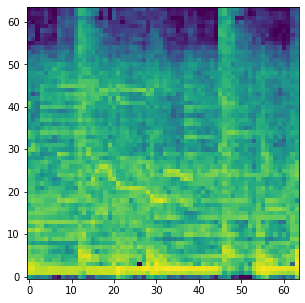

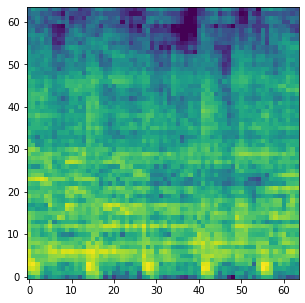

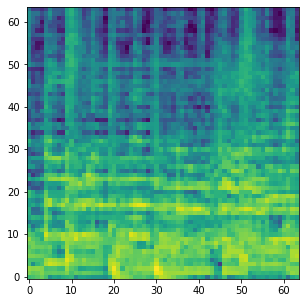

In [139]:
from PIL import Image

file_location = 'data/mels/'

gamma = .5
index = 512

shorten_factor = 1

#the mystery lights
plt.figure(figsize=(20,5))
plt.imshow(np.load(file_location + '0aQIO7AX9zLi9FFxON5DjJ.npy')[:,index:index+64*shorten_factor]**gamma, origin='lower', aspect=shorten_factor)
plt.show()

#king khan and bbq
plt.figure(figsize=(20,5))
plt.imshow(np.load(file_location + '00XrSeoUJusUuWvqd08lyF.npy')[:,index:index+64*shorten_factor]**gamma, origin='lower', aspect=shorten_factor)
plt.show()

#madonna
plt.figure(figsize=(20,5))
plt.imshow(np.load(file_location + '6r8k1vznHrzlEKYxL4dZEe.npy')[:,index:index+64*shorten_factor]**gamma, origin='lower', aspect=shorten_factor)
plt.show()

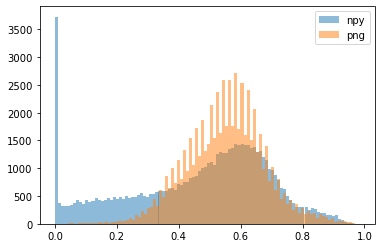

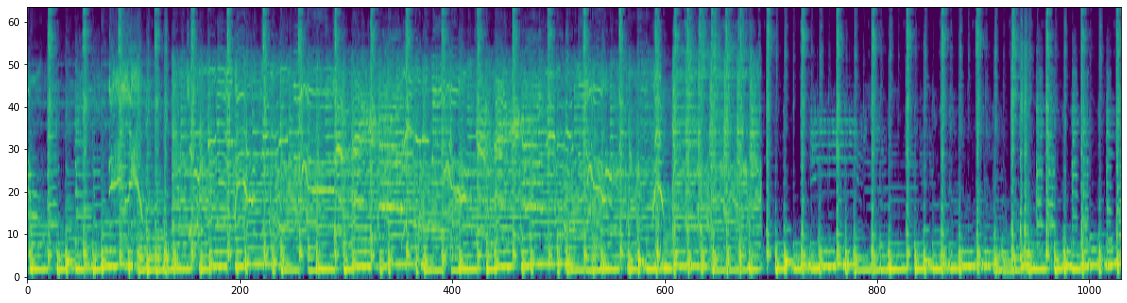

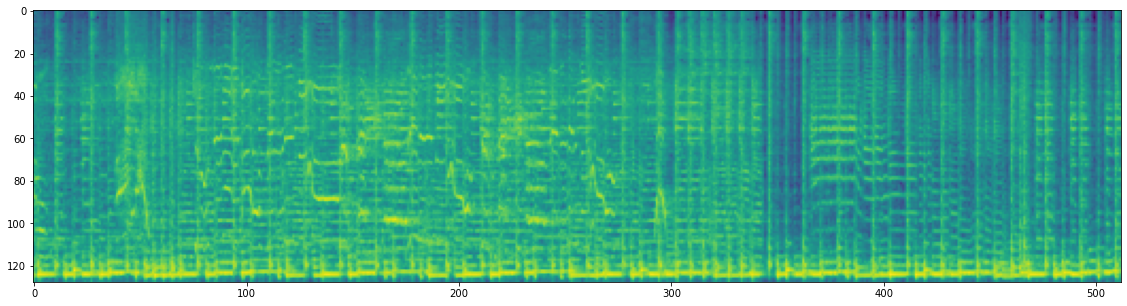

In [141]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler

transformer = PowerTransformer(method='box-cox')
scaler = MinMaxScaler()

gamma = .5

original = Image.open('0aQIO7AX9zLi9FFxON5DjJ.png').convert("L")
npy_version = np.load(file_location + '0aQIO7AX9zLi9FFxON5DjJ.npy')**gamma

img = Image.open('0aQIO7AX9zLi9FFxON5DjJ.png').convert("L")
plt.hist(npy_version.reshape(-1), alpha=.5, label='npy', bins=100)
plt.hist((np.array(original)/255).reshape(-1), bins=100, alpha=.5, label='png')
plt.legend()
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(npy_version, origin='lower', aspect=4)
plt.show()

plt.figure(figsize=(20,5))
plt.imshow(original)
plt.show()